In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from einops import rearrange, reduce, repeat
import serial
import scipy
from IPython.display import HTML
import time
from tqdm.notebook import tqdm

np.set_printoptions(precision=4, suppress=True)

In [25]:
def open_serial():
    global com
    com_port = "COM4"
    if "com" in globals():
        com.close()
    com = serial.Serial(
        port=com_port,
        baudrate=115200,
        bytesize=8,
        timeout=10,
        parity=serial.PARITY_NONE,
        stopbits=serial.STOPBITS_ONE,
    )

In [26]:
def read_raw_data():
    global com
    open_serial()
    head = com.read_until(b"\xff\xff\xff\xff")
    if len(head) < 4:
        com.close()
        raise ValueError("Read timeout, invalid header")
    buf = com.read(4096 * 2)
    if len(buf) < 4096 * 2:
        com.close()
        raise ValueError("Read timeout, invalid data")
    data = np.frombuffer(buf, dtype=np.int16)
    com.close()
    return data

In [50]:
data = read_raw_data()

4096


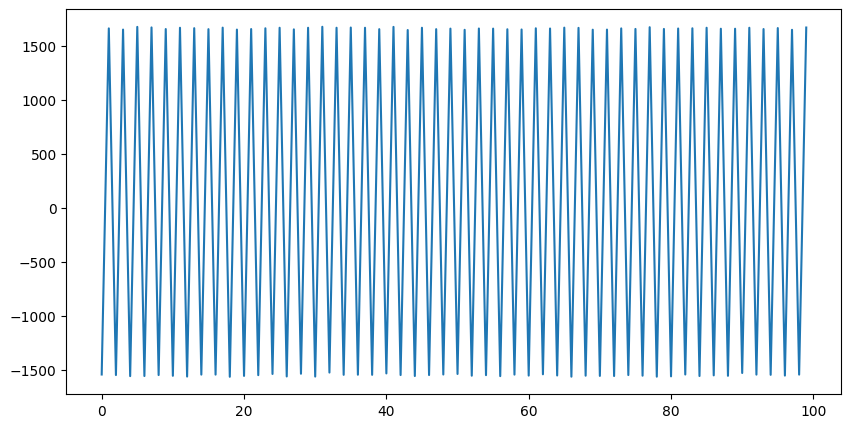

In [51]:
print(len(data))
plt.figure(figsize=(10, 5))
plt.plot(data[0:100])
plt.show()